<font color='blue' size="+2"><b>Imports </b></font>

In [73]:
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
# makes sure that the outputted plot will appear immediately under each code cell
%matplotlib inline


<font color='blue' size="+2"><b>Upload the dataset </b></font>

In [74]:
# dataset for movies
movies = pd.read_csv('movies.csv')
movies['released'] = pd.to_datetime(movies.released)

# get columns
columns = movies.columns
    

<font color='green' size="+1.75"><b>Data Preprocessing </b></font><br>


<font color='blue' size="+1"><b>Clean the data </b></font><br>
### For clustering the data must either be an integer or float 
### Since K-Means uses Euclidean distance, having categorical data is not a good idea

<font color='black' size="+0"><i><b>Check for NULL values in the whole document as well as columnwise distribution </i></b></font><br>

In [75]:
# feature engineering
movies.pop('released')
movies.pop('writer')
movies.pop('star')
movies.pop('runtime')
movies.pop('year')

movies_names = movies.pop('name')


           


# get a copy of the dataset with categorical columns
movies_cat = movies.select_dtypes(include=['object']).copy()

# get the number of null values
print(movies.isnull().values.sum())

# columnwise distribution of null values
print(movies.isnull().sum())

# int/float = budget, gross, runtime, score, votes, year
# text = company-2179, country-57, director-2759, genre-17,name-6731, rating-13, released-2403, star-2504, writer-4199, 

# Frequency distribution of categories within the feature
#print(movies_cat['writer'].value_counts())

# count of distinct categories in a feature
#print(movies_cat['writer'].value_counts().count())

# Remove the name column because each value is different and they cannot be classified into clusters




0
budget      0
company     0
country     0
director    0
genre       0
gross       0
rating      0
score       0
votes       0
dtype: int64


In [76]:
# %matplotlib inline
# from ast import literal_eval
# # plot of frequency distribution of each categorical feature

# # int/float = budget, gross, runtime, score, votes, year
# # text = company-2179, country-57, director-2759, genre-17,name-6731, rating-13, released-2403, star-2504, writer-4199, 


# company_count = movies['company'].value_counts()
# print(company_count.index)
# sns.set(style="darkgrid")
# sns.barplot(company_count.index,company_count.values, alpha=0.9)
# plt.title('Frequency Distribution of Companies')
# plt.ylabel('Number of Occurrences', fontsize=12)
# plt.xlabel('Company', fontsize=12)
# plt.show()

<font color='black' size="+2"><b>Categorical Data to Numeric </b></font><br>


In [77]:
# Transform the categorical data to dummies
# int/float = budget, gross, runtime, score, votes, year
# text = company, country, director, genre,name, rating, released, star, writer,

# LABEL ENCODING 
## DISADVANTAGE : Numerical values can be misinterpreted US => 1, China => 56

def label_encoding(df,col):
    df[str(col)] = df[str(col)].astype('category')
    df[str(col)] = df[str(col)].cat.codes
    df.head()
    return df

# ONE-HOT ENCODING
## Advantage => Weighing a value properly
## Disadvantage => "Curse of Dimensionality"

def one_hot(df,cols):
    movies_onehot = df.copy()
    for j in cols:
        movies_onehot[j] = movies_onehot[j].astype('category')
    movies_onehot = pd.get_dummies(movies_onehot, columns=cols)
    movies_onehot.head()
    return movies_onehot


In [78]:
# Retrieve the names of all categorical columns and store it in a list for one-hot encoding

cat_col_indexed = movies_cat.columns
cat_col = []
for i in cat_col_indexed:
    cat_col.append(i)
print(cat_col)

for i in cat_col:
    temp = label_encoding(movies,i)
#temp = one_hot(movies,cat_col)
temp.columns
    

['company', 'country', 'director', 'genre', 'rating']


Index([u'budget', u'company', u'country', u'director', u'genre', u'gross',
       u'rating', u'score', u'votes'],
      dtype='object')

In [79]:
# convert a pandas dataframe to numpy array

movies_arr = temp.values
print(movies_arr.shape)



(6820L, 9L)


### Correlation

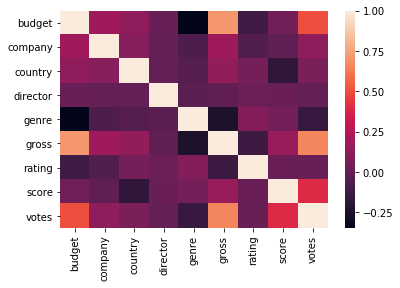

In [80]:
import seaborn as sns
corr = temp.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [81]:
corr = temp.corr()
corr.style.background_gradient()

,budget,company,country,director,genre,gross,rating,score,votes
budget,1,0.187205,0.137635,0.0116018,-0.346794,0.712196,-0.11966,0.0421447,0.503924
company,0.187205,1,0.10795,0.00431963,-0.0683303,0.18722,-0.06225,-0.0104262,0.138662
country,0.137635,0.10795,1,0.00369835,-0.0427926,0.149988,0.057979,-0.174414,0.0786571
director,0.0116018,0.00431963,0.00369835,1,-0.0276685,-0.0114292,0.0219256,0.0171302,0.000639015
genre,-0.346794,-0.0683303,-0.0427926,-0.0276685,1,-0.242676,0.10096,0.0562342,-0.150519
gross,0.712196,0.18722,0.149988,-0.0114292,-0.242676,1,-0.135538,0.165693,0.662457
rating,-0.11966,-0.06225,0.057979,0.0219256,0.10096,-0.135538,1,0.0192708,0.0116783
score,0.0421447,-0.0104262,-0.174414,0.0171302,0.0562342,0.165693,0.0192708,1,0.393607
votes,0.503924,0.138662,0.0786571,0.000639015,-0.150519,0.662457,0.0116783,0.393607,1


<font color='blue' size="+2"><b>Standardization </b></font>

In [82]:
# Arranging data so that each sample is a column in the data matrix
X = movies_arr.T # Data matrix

# Computation of the empirical mean of data, both as a vector and as a tiled matrix
mean_vec = X.mean(axis = 1)
mean_mat = np.tile(mean_vec.reshape(X.shape[0],1),[1,X.shape[1]])

# Centered data matrix
centered_X = X - mean_mat




<font color='blue' size="+1"><b>Principal Component Analysis</b></font>

In [83]:
# Singular value decomposition of centered data
U, s, Vh = np.linalg.svd(centered_X)

print(s)


[5.36108461e+09 1.92382321e+09 8.05854901e+06 6.60057587e+04
 5.23250282e+04 1.16193341e+03 2.01392953e+02 1.05810198e+02
 7.27608778e+01]


In [84]:
# Matrix of the top 2 principal components of the centered data matrix
U_2 = U[:,0:2]

# Compute the PCA-based features of the centered data using the top-two principal components
X_tilde = np.matmul(U_2.T,centered_X)

(2L, 6820L)


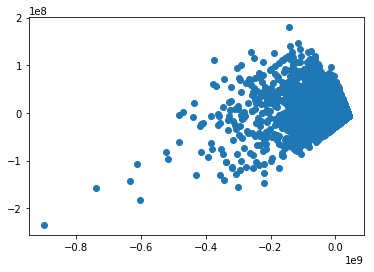

In [85]:
print(X_tilde.shape)
x = X_tilde[0,:]
y = X_tilde[1,:]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y)
plt.show()

In [86]:
# Create a trace
import plotly
init_notebook_mode(connected=True)

#py.tools.set_credentials_file(username='manviagarwal', api_key='Pesu@123')

trace = go.Scatter(
    x = x,
    y = y,
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
plotly.offline.plot(data,filename='basic-scatter',auto_open=True)

# or plot with: plot_url = py.plot(data, filename='basic-line')

'file://C:\\Users\\maanv\\OneDrive\\Desktop\\Fall 2018\\ML\\Datasets\\basic-scatter.html'

## Notice how the scale is in Millions

In [87]:
data = X_tilde.T
print(data.shape)
old_data = data

(6820L, 2L)


## NORMALIZATION

[[0.0, 1.0], [0.0, 1.0]]
[[0.947042   0.5099354 ]
 [0.93135233 0.48523946]
 [0.82420887 0.3787119 ]
 ...
 [0.99470148 0.5559592 ]
 [0.99997576 0.55282217]
 [0.99996475 0.55280868]]


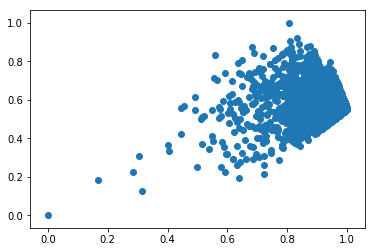

In [117]:

# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = []
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax
 
# scaled_value = (value - min) / (max - min)
# Calculate min and max for each column
minmax = dataset_minmax(data)
print(minmax)

def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
            
normalize_dataset(data, minmax)
print(data)


x = data[:,0]
y = data[:,1]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y)
plt.show()



In [118]:
# Euclidean Distance
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

(6820L, 2L)
(6820L,)


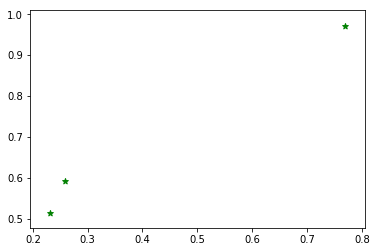

In [131]:
# Number of clusters
# random centroids
k = 3
# X coordinates of random centroids
C_x = np.random.random_sample(size=k)

# Y coordinates of random centroids
C_y = np.random.random_sample(size=k)


C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

plt.scatter(C_x, C_y, marker='*', c='g')
print(data.shape)
X = data


# To store the value of centroids when it updates
C_old = np.zeros(C.shape)

clusters = np.zeros(len(X))
print(clusters.shape)



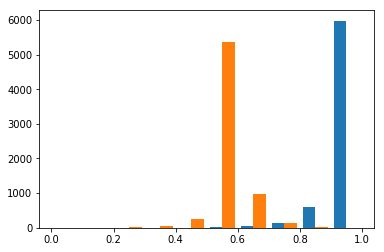

[[0.23122725 0.51292574]
 [0.7693259  0.9715482 ]
 [0.2595051  0.59216905]]


In [132]:
plt.hist(X)
plt.show()
print(C)

In [133]:
color = ['r','g','b']
k = 3
print(len(X))
print(C)
print(C_old)

# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
print(error)

print(C)
while error != 0:
    for i in range(len(X)):
        distances = dist(X[i], C)
        print("distance",distances)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        print(clusters[i])
    C_old = C
    #print(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)

    error = dist(C, C_old, None)
    

6820
[[0.23122725 0.51292574]
 [0.7693259  0.9715482 ]
 [0.2595051  0.59216905]]
[[0. 0.]
 [0. 0.]
 [0. 0.]]
1.506762819934324
[[0.23122725 0.51292574]
 [0.7693259  0.9715482 ]
 [0.2595051  0.59216905]]
('distance', array([0.715821  , 0.49464066, 0.69243727]))
1.0
('distance', array([0.70067229, 0.51259023, 0.68030334]))
1.0
('distance', array([0.60798072, 0.59537133, 0.60370051]))
1.0
('distance', array([0.68000666, 0.49756958, 0.65875113]))
1.0
('distance', array([0.74781537, 0.46978683, 0.71977907]))
1.0
('distance', array([0.64491433, 0.57311342, 0.63547068]))
1.0
('distance', array([0.74836448, 0.4324844 , 0.71596605]))
1.0
('distance', array([0.75895531, 0.47020626, 0.730372  ]))
1.0
('distance', array([0.72647549, 0.48406352, 0.70125432]))
1.0
('distance', array([0.72379721, 0.47114245, 0.69715269]))
1.0
('distance', array([0.61736969, 0.60336555, 0.61372417]))
1.0
('distance', array([0.75815529, 0.44763752, 0.72699924]))
1.0
('distance', array([0.75930641, 0.47000417, 0.7306804

('distance', array([0.76957138, 0.47816673, 0.74132926]))
1.0
('distance', array([0.76966883, 0.47811251, 0.74141491]))
1.0
('distance', array([0.75758227, 0.42775583, 0.72418473]))
1.0
('distance', array([0.76708129, 0.4795679 , 0.73914248]))
1.0
('distance', array([0.76107068, 0.44385893, 0.7293288 ]))
1.0
('distance', array([0.76856394, 0.47872997, 0.74044411]))
1.0
('distance', array([0.76953569, 0.4781866 , 0.74129789]))
1.0
('distance', array([0.75585293, 0.4862666 , 0.72932669]))
1.0
('distance', array([0.7691322 , 0.47841166, 0.74094332]))
1.0
('distance', array([0.76927482, 0.47833202, 0.74106863]))
1.0
('distance', array([0.76137945, 0.4828911 , 0.73414859]))
1.0
('distance', array([0.74644311, 0.45884082, 0.71719385]))
1.0
('distance', array([0.76788027, 0.47911502, 0.73984375]))
1.0
('distance', array([0.7651105 , 0.47275764, 0.73648747]))
1.0
('distance', array([0.75909145, 0.46084996, 0.72941204]))
1.0
('distance', array([0.76926808, 0.47833578, 0.74106271]))
1.0
('distan

('distance', array([0.7671478 , 0.47953008, 0.73920085]))
1.0
('distance', array([0.76100853, 0.47136038, 0.73244811]))
1.0
('distance', array([0.7445271 , 0.4506497 , 0.71441944]))
1.0
('distance', array([0.76601215, 0.48017882, 0.73820465]))
1.0
('distance', array([0.76929278, 0.478322  , 0.74108441]))
1.0
('distance', array([0.76747682, 0.47006397, 0.73840989]))
1.0
('distance', array([0.74095539, 0.37048326, 0.70193929]))
1.0
('distance', array([0.76459346, 0.48076315, 0.73693371]))
1.0
('distance', array([0.76807229, 0.47900664, 0.74001235]))
1.0
('distance', array([0.76724464, 0.47947504, 0.73928583]))
1.0
('distance', array([0.76695581, 0.47963931, 0.73903238]))
1.0
('distance', array([0.76789389, 0.47910732, 0.73985571]))
1.0
('distance', array([0.75142573, 0.48908205, 0.7254776 ]))
1.0
('distance', array([0.75050884, 0.48967767, 0.72468199]))
1.0
('distance', array([0.75992974, 0.48376174, 0.73288193]))
1.0
('distance', array([0.71960924, 0.51237738, 0.69821659]))
1.0
('distan

('distance', array([0.73591285, 0.48481154, 0.7102904 ]))
1.0
('distance', array([0.75949755, 0.46756607, 0.73057698]))
1.0
('distance', array([0.76239753, 0.47757695, 0.73448702]))
1.0
('distance', array([0.72948799, 0.50454892, 0.70659976]))
1.0
('distance', array([0.71610488, 0.48171478, 0.69112351]))
1.0
('distance', array([0.75605695, 0.48613925, 0.72950437]))
1.0
('distance', array([0.7191837 , 0.45247325, 0.69052651]))
1.0
('distance', array([0.76827306, 0.47889352, 0.74018864]))
1.0
('distance', array([0.71763707, 0.49578059, 0.69430008]))
1.0
('distance', array([0.74811649, 0.47316437, 0.72046227]))
1.0
('distance', array([0.76217108, 0.45916191, 0.73213114]))
1.0
('distance', array([0.68406608, 0.46141261, 0.65807209]))
1.0
('distance', array([0.72036459, 0.43507629, 0.68959259]))
1.0
('distance', array([0.76135821, 0.46535947, 0.73208025]))
1.0
('distance', array([0.69725557, 0.44863396, 0.66912523]))
1.0
('distance', array([0.7197253 , 0.45451195, 0.69128578]))
1.0
('distan

('distance', array([0.76848526, 0.47877417, 0.740375  ]))
1.0
('distance', array([0.76964021, 0.47812843, 0.74138975]))
1.0
('distance', array([0.67172483, 0.51122118, 0.65262082]))
1.0
('distance', array([0.54448907, 0.63253685, 0.54941947]))
0.0
('distance', array([0.70920195, 0.49090059, 0.68569241]))
1.0
('distance', array([0.56634161, 0.54310792, 0.55629676]))
1.0
('distance', array([0.64422959, 0.47359246, 0.62140184]))
1.0
('distance', array([0.6868507 , 0.40112957, 0.65342592]))
1.0
('distance', array([0.73325808, 0.45993158, 0.70480543]))
1.0
('distance', array([0.68859331, 0.46787613, 0.66320533]))
1.0
('distance', array([0.7259981 , 0.48192028, 0.7005422 ]))
1.0
('distance', array([0.70930139, 0.52115582, 0.68955761]))
1.0
('distance', array([0.63780733, 0.47997021, 0.61606649]))
1.0
('distance', array([0.69405099, 0.36244776, 0.65588894]))
1.0
('distance', array([0.6987585 , 0.49038622, 0.6756999 ]))
1.0
('distance', array([0.74005271, 0.48077169, 0.71372822]))
1.0
('distan

('distance', array([0.76218066, 0.48241442, 0.73484917]))
1.0
('distance', array([0.76872765, 0.47863811, 0.74058791]))
1.0
('distance', array([0.76940276, 0.47826066, 0.74118106]))
1.0
('distance', array([0.7684023 , 0.47882079, 0.74030215]))
1.0
('distance', array([0.76666687, 0.47980403, 0.73877889]))
1.0
('distance', array([0.7695511 , 0.47817802, 0.74131143]))
1.0
('distance', array([0.76817905, 0.47894646, 0.74010609]))
1.0
('distance', array([0.76449624, 0.48105465, 0.73687605]))
1.0
('distance', array([0.76927745, 0.47833055, 0.74107095]))
1.0
('distance', array([0.76916639, 0.47839256, 0.74097336]))
1.0
('distance', array([0.76506193, 0.4807265 , 0.73737169]))
1.0
('distance', array([0.76027197, 0.44426952, 0.72861884]))
1.0
('distance', array([0.76795391, 0.47907343, 0.73990841]))
1.0
('distance', array([0.76823715, 0.46965035, 0.73908015]))
1.0
('distance', array([0.769527  , 0.47819144, 0.74129025]))
1.0
('distance', array([0.76846455, 0.47878581, 0.74035681]))
1.0
('distan

('distance', array([0.76864555, 0.47868416, 0.74051579]))
1.0
('distance', array([0.76653868, 0.47987725, 0.73866643]))
1.0
('distance', array([0.76740732, 0.47472753, 0.73888608]))
1.0
('distance', array([0.75877045, 0.48446554, 0.73186992]))
1.0
('distance', array([0.75436366, 0.48720255, 0.72803051]))
1.0
('distance', array([0.76775434, 0.47918619, 0.7397332 ]))
1.0
('distance', array([0.76583481, 0.48028069, 0.73804916]))
1.0
('distance', array([0.74574718, 0.49284079, 0.72055905]))
1.0
('distance', array([0.76876173, 0.478619  , 0.74061784]))
1.0
('distance', array([0.7567941 , 0.4856809 , 0.73014655]))
1.0
('distance', array([0.7655867 , 0.48042348, 0.73783164]))
1.0
('distance', array([0.74544036, 0.49304866, 0.72029391]))
1.0
('distance', array([0.74359177, 0.47004038, 0.71580711]))
1.0
('distance', array([0.76759548, 0.47927608, 0.73959375]))
1.0
('distance', array([0.7534253 , 0.48059757, 0.72636254]))
1.0
('distance', array([0.76755893, 0.47929678, 0.73956167]))
1.0
('distan

('distance', array([0.76294147, 0.48196472, 0.73551478]))
1.0
('distance', array([0.76099501, 0.44389771, 0.72926152]))
1.0
('distance', array([0.74103852, 0.47166736, 0.71357952]))
1.0
('distance', array([0.76967388, 0.4781097 , 0.74141935]))
1.0
('distance', array([0.73696154, 0.49898996, 0.71299244]))
1.0
('distance', array([0.76154899, 0.43024805, 0.72823236]))
1.0
('distance', array([0.76914838, 0.47515378, 0.74057944]))
1.0
('distance', array([0.76564406, 0.48039044, 0.73788192]))
1.0
('distance', array([0.74776677, 0.47219174, 0.72001639]))
1.0
('distance', array([0.74461597, 0.49360961, 0.7195818 ]))
1.0
('distance', array([0.76940302, 0.47826051, 0.74118129]))
1.0
('distance', array([0.76258666, 0.48217408, 0.73520433]))
1.0
('distance', array([0.76941686, 0.4782528 , 0.74119346]))
1.0
('distance', array([0.76722739, 0.47948484, 0.73927069]))
1.0
('distance', array([0.7568245 , 0.46212149, 0.72741374]))
1.0
('distance', array([0.7505016 , 0.43812235, 0.71864372]))
1.0
('distan

('distance', array([0.73409684, 0.47625601, 0.70754388]))
1.0
('distance', array([0.76682148, 0.47273489, 0.73810105]))
1.0
('distance', array([0.68145722, 0.51479977, 0.6623418 ]))
1.0
('distance', array([0.7552789 , 0.48662603, 0.72882692]))
1.0
('distance', array([0.71611238, 0.4742033 , 0.69021675]))
1.0
('distance', array([0.76742739, 0.47704009, 0.73917433]))
1.0
('distance', array([0.7386441 , 0.48171786, 0.71250697]))
1.0
('distance', array([0.70515917, 0.43570427, 0.6751317 ]))
1.0
('distance', array([0.68444887, 0.43868908, 0.65563768]))
1.0
('distance', array([0.74511606, 0.47385513, 0.71770235]))
1.0
('distance', array([0.73477971, 0.39945075, 0.6992571 ]))
1.0
('distance', array([0.74993787, 0.38354095, 0.71196219]))
1.0
('distance', array([0.76960462, 0.47814822, 0.74135847]))
1.0
('distance', array([0.73350352, 0.41801335, 0.70015208]))
1.0
('distance', array([0.72028872, 0.47364014, 0.69411928]))
1.0
('distance', array([0.74454793, 0.49365606, 0.71952305]))
1.0
('distan

('distance', array([0.7264231 , 0.45722498, 0.69798566]))
1.0
('distance', array([0.57330787, 0.61687653, 0.5741553 ]))
0.0
('distance', array([0.6426387 , 0.52893559, 0.62726369]))
1.0
('distance', array([0.69838915, 0.32740674, 0.6561774 ]))
1.0
('distance', array([0.75482444, 0.4071435 , 0.71924081]))
1.0
('distance', array([0.66127331, 0.3844848 , 0.62666094]))
1.0
('distance', array([0.57970761, 0.53716085, 0.56824144]))
1.0
('distance', array([0.68601536, 0.48818178, 0.66328674]))
1.0
('distance', array([0.64984634, 0.4735226 , 0.62679249]))
1.0
('distance', array([0.68333606, 0.4748218 , 0.65904834]))
1.0
('distance', array([0.72967789, 0.50440386, 0.70676167]))
1.0
('distance', array([0.72772099, 0.48815193, 0.70293048]))
1.0
('distance', array([0.72166921, 0.43659189, 0.69101618]))
1.0
('distance', array([0.69813037, 0.43344328, 0.6681284 ]))
1.0
('distance', array([0.69215911, 0.39293971, 0.65758242]))
1.0
('distance', array([0.73555868, 0.40125626, 0.70020569]))
1.0
('distan

1.0
('distance', array([0.76877729, 0.47861028, 0.74063151]))
1.0
('distance', array([0.76471639, 0.48092675, 0.73706892]))
1.0
('distance', array([0.76810363, 0.47898896, 0.74003987]))
1.0
('distance', array([0.7563134 , 0.46473434, 0.72723409]))
1.0
('distance', array([0.76968814, 0.47810178, 0.74143188]))
1.0
('distance', array([0.76925916, 0.47834076, 0.74105487]))
1.0
('distance', array([0.76972009, 0.47808401, 0.74145996]))
1.0
('distance', array([0.7677445 , 0.47919175, 0.73972456]))
1.0
('distance', array([0.76064979, 0.483328  , 0.73351091]))
1.0
('distance', array([0.76918052, 0.47606275, 0.74071549]))
1.0
('distance', array([0.76926945, 0.47833502, 0.74106391]))
1.0
('distance', array([0.75868083, 0.48452022, 0.73179172]))
1.0
('distance', array([0.75222548, 0.48856606, 0.72617199]))
1.0
('distance', array([0.76337427, 0.46302709, 0.73371656]))
1.0
('distance', array([0.7695787 , 0.47816266, 0.74133569]))
1.0
('distance', array([0.76971057, 0.4780893 , 0.74145159]))
1.0
('di

('distance', array([0.76749501, 0.479333  , 0.73950556]))
1.0
('distance', array([0.72946654, 0.48938325, 0.70473408]))
1.0
('distance', array([0.76617985, 0.48008262, 0.73835171]))
1.0
('distance', array([0.76964853, 0.4781238 , 0.74139706]))
1.0
('distance', array([0.76611212, 0.47359327, 0.7375309 ]))
1.0
('distance', array([0.76959243, 0.47815502, 0.74134775]))
1.0
('distance', array([0.73612214, 0.3620358 , 0.69638232]))
1.0
('distance', array([0.76804547, 0.47902176, 0.7399888 ]))
1.0
('distance', array([0.74098691, 0.42518017, 0.70810882]))
1.0
('distance', array([0.76549211, 0.48047799, 0.73774873]))
1.0
('distance', array([0.7242    , 0.40070504, 0.68927666]))
1.0
('distance', array([0.75094539, 0.48939356, 0.72506072]))
1.0
('distance', array([0.76677665, 0.4750795 , 0.73833151]))
1.0
('distance', array([0.76201509, 0.48251266, 0.73470437]))
1.0
('distance', array([0.76839664, 0.47882398, 0.74029717]))
1.0
('distance', array([0.76567176, 0.48037449, 0.73790621]))
1.0
('distan

1.0
('distance', array([0.76476059, 0.47902404, 0.73688804]))
1.0
('distance', array([0.75837692, 0.41637966, 0.72365522]))
1.0
('distance', array([0.75706928, 0.43917245, 0.72499837]))
1.0
('distance', array([0.75763013, 0.46980483, 0.72907171]))
1.0
('distance', array([0.76650365, 0.46141354, 0.73648929]))
1.0
('distance', array([0.7350783 , 0.42848605, 0.70285989]))
1.0
('distance', array([0.74241763, 0.3804919 , 0.70444082]))
1.0
('distance', array([0.74665369, 0.37859283, 0.70828073]))
1.0
('distance', array([0.74749361, 0.46290196, 0.71866545]))
1.0
('distance', array([0.7519548 , 0.46026818, 0.72258564]))
1.0
('distance', array([0.7349204 , 0.48180891, 0.7089897 ]))
1.0
('distance', array([0.76890754, 0.47621395, 0.7404754 ]))
1.0
('distance', array([0.73429695, 0.50093679, 0.71070844]))
1.0
('distance', array([0.74245536, 0.47076052, 0.71481515]))
1.0
('distance', array([0.76936885, 0.47827956, 0.74115127]))
1.0
('distance', array([0.76367273, 0.45607627, 0.73319604]))
1.0
('di

('distance', array([0.73731542, 0.46210007, 0.70891546]))
1.0
('distance', array([0.60503908, 0.42057861, 0.57635056]))
1.0
('distance', array([0.748457  , 0.48181057, 0.72180725]))
1.0
('distance', array([0.73502236, 0.43540315, 0.70360781]))
1.0
('distance', array([0.72779569, 0.41444698, 0.6942913 ]))
1.0
('distance', array([0.76428104, 0.47067293, 0.73546117]))
1.0
('distance', array([0.72285129, 0.41276587, 0.68936987]))
1.0
('distance', array([0.65745751, 0.4987116 , 0.63737833]))
1.0
('distance', array([0.75138536, 0.46879829, 0.72304384]))
1.0
('distance', array([0.69943634, 0.38828531, 0.66405816]))
1.0
('distance', array([0.62103779, 0.4591521 , 0.5971048 ]))
1.0
('distance', array([0.76753431, 0.47931073, 0.73954006]))
1.0
('distance', array([0.76526554, 0.48013955, 0.73749525]))
1.0
('distance', array([0.69230923, 0.41611278, 0.66046549]))
1.0
('distance', array([0.75908384, 0.44263106, 0.72730488]))
1.0
('distance', array([0.74276405, 0.42421734, 0.70969096]))
1.0
('distan

('distance', array([0.76935719, 0.47828607, 0.74114102]))
1.0
('distance', array([0.76325371, 0.4700886 , 0.73442226]))
1.0
('distance', array([0.7670902 , 0.46338586, 0.73727152]))
1.0
('distance', array([0.76961897, 0.47814025, 0.74137108]))
1.0
('distance', array([0.76401449, 0.48133536, 0.73645411]))
1.0
('distance', array([0.76026664, 0.48355848, 0.73317617]))
1.0
('distance', array([0.75488105, 0.47259623, 0.72679784]))
1.0
('distance', array([0.75824773, 0.44081254, 0.72630385]))
1.0
('distance', array([0.76893108, 0.47852414, 0.74076661]))
1.0
('distance', array([0.76880867, 0.47859268, 0.74065908]))
1.0
('distance', array([0.29454809, 0.89282799, 0.36997554]))
0.0
('distance', array([0.64164899, 0.56430565, 0.63116341]))
1.0
('distance', array([0.68252966, 0.31919747, 0.63982443]))
1.0
('distance', array([0.73671852, 0.32027174, 0.69247417]))
1.0
('distance', array([0.64216821, 0.36430694, 0.60555622]))
1.0
('distance', array([0.70497943, 0.47258877, 0.6794226 ]))
1.0
('distan

1.0
('distance', array([0.76846704, 0.47113766, 0.73946973]))
1.0
('distance', array([0.76632142, 0.48000151, 0.73847588]))
1.0
('distance', array([0.72114926, 0.38018534, 0.68402484]))
1.0
('distance', array([0.76616013, 0.45931571, 0.73592249]))
1.0
('distance', array([0.76032887, 0.44424017, 0.72866941]))
1.0
('distance', array([0.75731024, 0.40601005, 0.72147962]))
1.0
('distance', array([0.74733128, 0.47964245, 0.72048503]))
1.0
('distance', array([0.75931239, 0.42912233, 0.72598227]))
1.0
('distance', array([0.76197957, 0.48253376, 0.7346733 ]))
1.0
('distance', array([0.72378537, 0.31522391, 0.67946945]))
1.0
('distance', array([0.7426423 , 0.49496712, 0.71787884]))
1.0
('distance', array([0.76924031, 0.47835128, 0.74103831]))
1.0
('distance', array([0.76949904, 0.478207  , 0.74126568]))
1.0
('distance', array([0.72573797, 0.42248818, 0.69325393]))
1.0
('distance', array([0.76860864, 0.47522025, 0.74007764]))
1.0
('distance', array([0.75188911, 0.48878268, 0.72587988]))
1.0
('di

('distance', array([0.76624225, 0.45927244, 0.73599517]))
1.0
('distance', array([0.74042732, 0.42548634, 0.70761095]))
1.0
('distance', array([0.66308002, 0.49866779, 0.64274466]))
1.0
('distance', array([0.73248326, 0.42998912, 0.70056026]))
1.0
('distance', array([0.76765982, 0.47621209, 0.7392973 ]))
1.0
('distance', array([0.75620488, 0.4624733 , 0.72686804]))
1.0
('distance', array([0.71673764, 0.31831493, 0.67298319]))
1.0
('distance', array([0.76964117, 0.47812788, 0.74139059]))
1.0
('distance', array([0.74531138, 0.48215415, 0.71887169]))
1.0
('distance', array([0.73915136, 0.43760345, 0.70779373]))
1.0
('distance', array([0.7409452 , 0.49615087, 0.71641667]))
1.0
('distance', array([0.76951162, 0.47819999, 0.74127673]))
1.0
('distance', array([0.75496506, 0.45623699, 0.72496921]))
1.0
('distance', array([0.74573155, 0.38971313, 0.70862936]))
1.0
('distance', array([0.7697545 , 0.47806488, 0.74149021]))
1.0
('distance', array([0.75105671, 0.48932125, 0.72515732]))
1.0
('distan

1.0
('distance', array([0.68256664, 0.42071559, 0.65164192]))
1.0
('distance', array([0.76339521, 0.45394968, 0.73268851]))
1.0
('distance', array([0.68248078, 0.34742737, 0.64294942]))
1.0
('distance', array([0.72790573, 0.44439202, 0.69787986]))
1.0
('distance', array([0.72331528, 0.35098702, 0.68286609]))
1.0
('distance', array([0.68653229, 0.35595647, 0.64785942]))
1.0
('distance', array([0.73882716, 0.40841833, 0.70413809]))
1.0
('distance', array([0.6740086 , 0.41033282, 0.64213055]))
1.0
('distance', array([0.68927553, 0.30060454, 0.64438032]))
1.0
('distance', array([0.68367663, 0.4033347 , 0.6506252 ]))
1.0
('distance', array([0.76699245, 0.47961841, 0.73906452]))
1.0
('distance', array([0.75760497, 0.4804182 , 0.73029225]))
1.0
('distance', array([0.74115599, 0.16669089, 0.68188938]))
1.0
('distance', array([0.76538853, 0.47237321, 0.7367054 ]))
1.0
('distance', array([0.68013407, 0.36447461, 0.64262682]))
1.0
('distance', array([0.62661954, 0.41288057, 0.596439  ]))
1.0
('di

('distance', array([0.76961125, 0.4769838 , 0.74122919]))
1.0
('distance', array([0.74398019, 0.33794293, 0.70132193]))
1.0
('distance', array([0.7646707 , 0.44876886, 0.73330114]))
1.0
('distance', array([0.76980526, 0.47803668, 0.74153483]))
1.0
('distance', array([0.76979059, 0.47804483, 0.74152193]))
1.0
('distance', array([0.76285261, 0.43404214, 0.72989913]))
1.0
('distance', array([0.76976532, 0.47805887, 0.74149972]))
1.0
('distance', array([0.76811336, 0.47898347, 0.74004841]))
1.0
('distance', array([0.76959702, 0.47815246, 0.74135179]))
1.0
('distance', array([0.7697635 , 0.47805989, 0.74149811]))
1.0
('distance', array([0.76720918, 0.47553459, 0.73879293]))
1.0
('distance', array([0.76611075, 0.48012223, 0.73829112]))
1.0
('distance', array([0.76966938, 0.47811221, 0.74141539]))
1.0
('distance', array([0.76977311, 0.47805454, 0.74150657]))
1.0
('distance', array([0.76524692, 0.45752089, 0.7348519 ]))
1.0
('distance', array([0.76919675, 0.4783756 , 0.74100004]))
1.0
('distan

('distance', array([0.76417092, 0.44453051, 0.73234296]))
1.0
('distance', array([0.7477438 , 0.43507951, 0.71567389]))
1.0
('distance', array([0.74381776, 0.43496129, 0.71192753]))
1.0
('distance', array([0.74453512, 0.44601665, 0.71388824]))
1.0
('distance', array([0.72251916, 0.36855845, 0.68403987]))
1.0
('distance', array([0.76393587, 0.45821488, 0.7336916 ]))
1.0
('distance', array([0.76907436, 0.47844398, 0.7408925 ]))
1.0
('distance', array([0.70605776, 0.48956689, 0.68253966]))
1.0
('distance', array([0.76757398, 0.47928825, 0.73957488]))
1.0
('distance', array([0.76977818, 0.47805172, 0.74151102]))
1.0
('distance', array([0.68223705, 0.46546313, 0.65682601]))
1.0
('distance', array([0.74298761, 0.4609293 , 0.71416082]))
1.0
('distance', array([0.72031417, 0.42577896, 0.68845462]))
1.0
('distance', array([0.75667205, 0.43042775, 0.72362389]))
1.0
('distance', array([0.72302631, 0.35753148, 0.68330667]))
1.0
('distance', array([0.76746636, 0.47469467, 0.738938  ]))
1.0
('distan

('distance', array([0.7059467 , 0.40474628, 0.67223451]))
1.0
('distance', array([0.71660702, 0.428107  , 0.68518349]))
1.0
('distance', array([0.75211842, 0.42381969, 0.71854639]))
1.0
('distance', array([0.69704493, 0.40587665, 0.66380858]))
1.0
('distance', array([0.7411885 , 0.33901928, 0.69875735]))
1.0
('distance', array([0.73620497, 0.44828005, 0.70623491]))
1.0
('distance', array([0.76881944, 0.47510369, 0.7402631 ]))
1.0
('distance', array([0.73123758, 0.40801383, 0.69684371]))
1.0
('distance', array([0.70841918, 0.3434832 , 0.66766735]))
1.0
('distance', array([0.73577005, 0.33706208, 0.69334282]))
1.0
('distance', array([0.74561309, 0.46877528, 0.71757342]))
1.0
('distance', array([0.69605471, 0.44219278, 0.66719439]))
1.0
('distance', array([0.76748215, 0.46546496, 0.73788227]))
1.0
('distance', array([0.76566962, 0.45729883, 0.73522618]))
1.0
('distance', array([0.76966862, 0.47811259, 0.74141471]))
1.0
('distance', array([0.72910061, 0.36529971, 0.69000226]))
1.0
('distan

('distance', array([0.73833016, 0.49800491, 0.71416758]))
1.0
('distance', array([0.71878361, 0.47971243, 0.69342484]))
1.0
('distance', array([0.73936269, 0.46795189, 0.71155029]))
1.0
('distance', array([0.7219688 , 0.46508488, 0.69468666]))
1.0
('distance', array([0.7244893 , 0.20669019, 0.66932061]))
1.0
('distance', array([0.7174251 , 0.28727413, 0.67038695]))
1.0
('distance', array([0.74663977, 0.47768069, 0.71959804]))
1.0
('distance', array([0.70809934, 0.37637104, 0.67104042]))
1.0
('distance', array([0.65633685, 0.41203064, 0.62523633]))
1.0
('distance', array([0.74301095, 0.4354108 , 0.711212  ]))
1.0
('distance', array([0.72731716, 0.42155563, 0.69465422]))
1.0
('distance', array([0.73122044, 0.40132754, 0.69606641]))
1.0
('distance', array([0.74124831, 0.38749504, 0.70409971]))
1.0
('distance', array([0.73660189, 0.44838911, 0.70662511]))
1.0
('distance', array([0.71711678, 0.43953674, 0.68701804]))
1.0
('distance', array([0.74300111, 0.40188621, 0.70738369]))
1.0
('distan

('distance', array([0.75507607, 0.47958076, 0.72780335]))
1.0
('distance', array([0.76529847, 0.45522285, 0.73463614]))
1.0
('distance', array([0.76973281, 0.47807694, 0.74147114]))
1.0
('distance', array([0.76755138, 0.46542792, 0.7379434 ]))
1.0
('distance', array([0.41255712, 0.48779631, 0.3949333 ]))
2.0
('distance', array([0.68843977, 0.46040463, 0.66213275]))
1.0
('distance', array([0.41553958, 0.67384729, 0.4354243 ]))
0.0
('distance', array([0.69502858, 0.4308538 , 0.66484266]))
1.0
('distance', array([0.76794429, 0.4721155 , 0.73908953]))
1.0
('distance', array([0.72767188, 0.46361051, 0.69993342]))
1.0
('distance', array([0.67190184, 0.48757132, 0.64973887]))
1.0
('distance', array([0.76729816, 0.47944461, 0.73933279]))
1.0
('distance', array([0.60325224, 0.28176498, 0.55676245]))
1.0
('distance', array([0.41467839, 0.67788019, 0.4354102 ]))
0.0
('distance', array([0.72504452, 0.49772365, 0.70155914]))
1.0
('distance', array([0.68952967, 0.51403937, 0.66991302]))
1.0
('distan

('distance', array([0.74895322, 0.4573599 , 0.71940133]))
1.0
('distance', array([0.74972331, 0.45227831, 0.7195403 ]))
1.0
('distance', array([0.76931496, 0.47830961, 0.7411039 ]))
1.0
('distance', array([0.76959631, 0.47815285, 0.74135117]))
1.0
('distance', array([0.71440471, 0.46554894, 0.68754354]))
1.0
('distance', array([0.76744735, 0.47935998, 0.73946372]))
1.0
('distance', array([0.76650715, 0.46141169, 0.73649238]))
1.0
('distance', array([0.76975313, 0.47806564, 0.741489  ]))
1.0
('distance', array([0.7257952 , 0.46488124, 0.69830107]))
1.0
('distance', array([0.76875418, 0.47862323, 0.74061121]))
1.0
('distance', array([0.76957323, 0.47816569, 0.74133088]))
1.0
('distance', array([0.76975473, 0.47806476, 0.74149041]))
1.0
('distance', array([0.73385057, 0.46433094, 0.7058896 ]))
1.0
('distance', array([0.76974785, 0.47806858, 0.74148436]))
1.0
('distance', array([0.76941589, 0.47825333, 0.7411926 ]))
1.0
('distance', array([0.76976796, 0.4780574 , 0.74150204]))
1.0
('distan

('distance', array([0.75566215, 0.43316843, 0.72297711]))
1.0
('distance', array([0.76318734, 0.44727525, 0.73172536]))
1.0
('distance', array([0.74567412, 0.42267212, 0.71228507]))
1.0
('distance', array([0.75097077, 0.41995909, 0.717017  ]))
1.0
('distance', array([0.75976007, 0.44228268, 0.72790611]))
1.0
('distance', array([0.75788105, 0.43875444, 0.72572066]))
1.0
('distance', array([0.76267634, 0.4704133 , 0.73391432]))
1.0
('distance', array([0.74168865, 0.35960454, 0.70145366]))
1.0
('distance', array([0.76882362, 0.4785843 , 0.74067221]))
1.0
('distance', array([0.76053132, 0.46698065, 0.73148662]))
1.0
('distance', array([0.75040667, 0.37697724, 0.71168862]))
1.0
('distance', array([0.73711437, 0.43648359, 0.70572517]))
1.0
('distance', array([0.7692645 , 0.47833777, 0.74105956]))
1.0
('distance', array([0.69397329, 0.40793083, 0.66109493]))
1.0
('distance', array([0.73460773, 0.26720785, 0.68499766]))
1.0
('distance', array([0.67504785, 0.40956018, 0.64304098]))
1.0
('distan

('distance', array([0.68539432, 0.41389652, 0.65354428]))
1.0
('distance', array([0.70706705, 0.35499562, 0.66763757]))
1.0
('distance', array([0.63537784, 0.44007532, 0.60847959]))
1.0
('distance', array([0.70725912, 0.44625404, 0.67840315]))
1.0
('distance', array([0.75348916, 0.48534928, 0.72698469]))
1.0
('distance', array([0.60178567, 0.25684471, 0.55223702]))
1.0
('distance', array([0.75017513, 0.43152472, 0.7175772 ]))
1.0
('distance', array([0.72538438, 0.45312536, 0.69651033]))
1.0
('distance', array([0.70649077, 0.41595564, 0.67406839]))
1.0
('distance', array([0.73691976, 0.38307619, 0.69946789]))
1.0
('distance', array([0.72498271, 0.36731605, 0.68626963]))
1.0
('distance', array([0.76620136, 0.4618024 , 0.73624837]))
1.0
('distance', array([0.76973386, 0.47807632, 0.74147206]))
1.0
('distance', array([0.71469873, 0.43639515, 0.68433665]))
1.0
('distance', array([0.74338974, 0.45833105, 0.71423746]))
1.0
('distance', array([0.73735724, 0.49870407, 0.71333206]))
1.0
('distan

('distance', array([0.76762444, 0.47925965, 0.73961916]))
1.0
('distance', array([0.7247146 , 0.45117966, 0.69564187]))
1.0
('distance', array([0.75487928, 0.45168868, 0.72436118]))
1.0
('distance', array([0.750196  , 0.33567291, 0.70704129]))
1.0
('distance', array([0.75578159, 0.42642851, 0.72232391]))
1.0
('distance', array([0.67567939, 0.38568563, 0.64079211]))
1.0
('distance', array([0.6867198 , 0.32319614, 0.64435659]))
1.0
('distance', array([0.70691877, 0.36600074, 0.6687287 ]))
1.0
('distance', array([0.66909782, 0.31231964, 0.6259063 ]))
1.0
('distance', array([0.76101926, 0.46277796, 0.73145999]))
1.0
('distance', array([0.75823462, 0.43633361, 0.72577964]))
1.0
('distance', array([0.76906285, 0.4784504 , 0.74088238]))
1.0
('distance', array([0.70788463, 0.35455234, 0.66837796]))
1.0
('distance', array([0.767051  , 0.47492614, 0.73857273]))
1.0
('distance', array([0.76159614, 0.48276182, 0.73433802]))
1.0
('distance', array([0.74909503, 0.44573034, 0.71818519]))
1.0
('distan

('distance', array([0.76766759, 0.46765929, 0.73831142]))
1.0
('distance', array([0.76388434, 0.48141135, 0.73634013]))
1.0
('distance', array([0.68849337, 0.30102582, 0.64366144]))
1.0
('distance', array([0.73820532, 0.43815151, 0.70695707]))
1.0
('distance', array([0.7141846 , 0.35123566, 0.6740923 ]))
1.0
('distance', array([0.73631   , 0.45091088, 0.70664311]))
1.0
('distance', array([0.73873786, 0.42641948, 0.70610879]))
1.0
('distance', array([0.70273654, 0.4397965 , 0.67330296]))
1.0
('distance', array([0.73768431, 0.4984685 , 0.71361286]))
1.0
('distance', array([0.7578327 , 0.45694412, 0.7277676 ]))
1.0
('distance', array([0.76762254, 0.4686031 , 0.73837819]))
1.0
('distance', array([0.75243073, 0.44161967, 0.72087743]))
1.0
('distance', array([0.7359226 , 0.44646498, 0.70575393]))
1.0
('distance', array([0.7533771 , 0.42540854, 0.71992335]))
1.0
('distance', array([0.71605537, 0.44500005, 0.68665313]))
1.0
('distance', array([0.76980515, 0.47803672, 0.74153473]))
1.0
('distan

('distance', array([0.71020538, 0.39756014, 0.67549244]))
1.0
('distance', array([0.6764264 , 0.37371726, 0.64010471]))
1.0
('distance', array([0.60947617, 0.40394778, 0.57849155]))
1.0
('distance', array([0.67989008, 0.40602486, 0.64729159]))
1.0
('distance', array([0.69203817, 0.46257536, 0.66584191]))
1.0
('distance', array([0.66343634, 0.34878141, 0.62453205]))
1.0
('distance', array([0.76614961, 0.47079253, 0.73724065]))
1.0
('distance', array([0.73740141, 0.45024284, 0.7076023 ]))
1.0
('distance', array([0.73080696, 0.41953572, 0.69775324]))
1.0
('distance', array([0.74893859, 0.42098484, 0.71519992]))
1.0
('distance', array([0.69538134, 0.43783023, 0.66602161]))
1.0
('distance', array([0.75756924, 0.37406828, 0.71820742]))
1.0
('distance', array([0.73886564, 0.49762224, 0.71462773]))
1.0
('distance', array([0.64044281, 0.35423742, 0.60263859]))
1.0
('distance', array([0.71698098, 0.38244994, 0.68027594]))
1.0
('distance', array([0.73215744, 0.45350497, 0.70299986]))
1.0
('distan

('distance', array([0.73301844, 0.43658924, 0.70183702]))
1.0
('distance', array([0.76338162, 0.44045295, 0.73112981]))
1.0
('distance', array([0.76694924, 0.47614517, 0.73861861]))
1.0
('distance', array([0.74125637, 0.43639898, 0.70965709]))
1.0
('distance', array([0.76834216, 0.47885461, 0.74024933]))
1.0
('distance', array([0.75625265, 0.43959605, 0.72427209]))
1.0
('distance', array([0.69943927, 0.38150639, 0.66327851]))
1.0
('distance', array([0.76933575, 0.47829801, 0.74112218]))
1.0
('distance', array([0.76980242, 0.47803826, 0.74153233]))
1.0
('distance', array([0.72958004, 0.5044786 , 0.70667824]))
1.0
('distance', array([0.76184545, 0.42570045, 0.72799937]))
1.0
('distance', array([0.76058551, 0.42629928, 0.72687112]))
1.0
('distance', array([0.76545447, 0.46656081, 0.73609274]))
1.0
('distance', array([0.76966471, 0.4781148 , 0.74141128]))
1.0
('distance', array([0.72622488, 0.50707331, 0.70382197]))
1.0
('distance', array([0.67075052, 0.50220812, 0.65052406]))
1.0
('distan

1.0
('distance', array([0.7475421 , 0.43066808, 0.71497607]))
1.0
('distance', array([0.62707023, 0.37646236, 0.59223743]))
1.0
('distance', array([0.66647652, 0.31396877, 0.62351776]))
1.0
('distance', array([0.74890827, 0.44354507, 0.71775532]))
1.0
('distance', array([0.72838174, 0.48767116, 0.7034986 ]))
1.0
('distance', array([0.72120847, 0.47051593, 0.69461661]))
1.0
('distance', array([0.68345985, 0.45183645, 0.65630478]))
1.0
('distance', array([0.67930234, 0.4679264 , 0.65432561]))
1.0
('distance', array([0.76084885, 0.4832085 , 0.73368484]))
1.0
('distance', array([0.75655604, 0.33353152, 0.71290607]))
1.0
('distance', array([0.69482522, 0.48069486, 0.67074694]))
1.0
('distance', array([0.73414331, 0.50105017, 0.71057689]))
1.0
('distance', array([0.76956088, 0.47817256, 0.74132003]))
1.0
('distance', array([0.69401137, 0.42679025, 0.66337833]))
1.0
('distance', array([0.74059186, 0.4719553 , 0.71319024]))
1.0
('distance', array([0.71733707, 0.51425774, 0.69629983]))
1.0
('di

('distance', array([0.74542195, 0.41833824, 0.71155155]))
1.0
('distance', array([0.72550265, 0.45783713, 0.69718268]))
1.0
('distance', array([0.72509214, 0.41146469, 0.6913635 ]))
1.0
('distance', array([0.75998006, 0.44894068, 0.72887828]))
1.0
('distance', array([0.76940286, 0.4782606 , 0.74118115]))
1.0
('distance', array([0.69225671, 0.41379187, 0.66013848]))
1.0
('distance', array([0.76953566, 0.47667773, 0.74112224]))
1.0
('distance', array([0.76239753, 0.48228593, 0.73503887]))
1.0
('distance', array([0.69674741, 0.44168505, 0.66779643]))
1.0
('distance', array([0.7695151 , 0.47703706, 0.74114464]))
1.0
('distance', array([0.76925253, 0.47834445, 0.74104905]))
1.0
('distance', array([0.75917142, 0.43363158, 0.72636065]))
1.0
('distance', array([0.76960444, 0.47814829, 0.74135831]))
1.0
('distance', array([0.7649745 , 0.4508669 , 0.73382923]))
1.0
('distance', array([0.7100683 , 0.26613976, 0.66106387]))
1.0
('distance', array([0.76163258, 0.42580112, 0.72780869]))
1.0
('distan

('distance', array([0.71280846, 0.41888033, 0.68046687]))
1.0
('distance', array([0.7554691 , 0.48650671, 0.72899249]))
1.0
('distance', array([0.56438867, 0.28949453, 0.51803153]))
1.0
('distance', array([0.76717069, 0.47023125, 0.73814011]))
1.0
('distance', array([0.76846254, 0.47855398, 0.74032789]))
1.0
('distance', array([0.69899206, 0.38856268, 0.66366204]))
1.0
('distance', array([0.7175043 , 0.41137924, 0.68409118]))
1.0
('distance', array([0.72646783, 0.46684943, 0.69917582]))
1.0
('distance', array([0.69670938, 0.43445696, 0.66688802]))
1.0
('distance', array([0.74021761, 0.49666304, 0.71579041]))
1.0
('distance', array([0.74247572, 0.44029102, 0.71126712]))
1.0
('distance', array([0.74851764, 0.44376221, 0.71740948]))
1.0
('distance', array([0.76980591, 0.4780363 , 0.74153539]))
1.0
('distance', array([0.75089573, 0.43114699, 0.71821885]))
1.0
('distance', array([0.75502466, 0.43349421, 0.72240901]))
1.0
('distance', array([0.66699038, 0.36884671, 0.63035719]))
1.0
('distan

('distance', array([0.7119673 , 0.34165905, 0.67089694]))
1.0
('distance', array([0.57929793, 0.15446125, 0.51530355]))
1.0
('distance', array([0.66539431, 0.47757756, 0.64223281]))
1.0
('distance', array([0.54886965, 0.56321318, 0.54262352]))
2.0
('distance', array([0.74266356, 0.41978113, 0.70908846]))
1.0
('distance', array([0.72691889, 0.4887386 , 0.70224124]))
1.0
('distance', array([0.6103766 , 0.31164052, 0.56760969]))
1.0
('distance', array([0.58927532, 0.41104987, 0.55956768]))
1.0
('distance', array([0.69435447, 0.37340218, 0.65743588]))
1.0
('distance', array([0.71402662, 0.35131668, 0.67394881]))
1.0
('distance', array([0.6378978 , 0.50787367, 0.61988765]))
1.0
('distance', array([0.71151399, 0.48778422, 0.68750491]))
1.0
('distance', array([0.69272492, 0.24772906, 0.64222057]))
1.0
('distance', array([0.70641009, 0.4113674 , 0.67345284]))
1.0
('distance', array([0.68893026, 0.37681204, 0.65258351]))
1.0
('distance', array([0.74913453, 0.45493088, 0.71929025]))
1.0
('distan

('distance', array([0.76748417, 0.47933914, 0.73949605]))
1.0
('distance', array([0.76249881, 0.4364345 , 0.72983547]))
1.0
('distance', array([0.76980518, 0.47803673, 0.74153475]))
1.0
('distance', array([0.76815073, 0.4789624 , 0.74008122]))
1.0
('distance', array([0.76845266, 0.47183737, 0.73953734]))
1.0
('distance', array([0.7689928 , 0.47385119, 0.7402812 ]))
1.0
('distance', array([0.76973726, 0.47807447, 0.74147505]))
1.0
('distance', array([0.76978611, 0.47804732, 0.74151799]))
1.0
('distance', array([0.76939834, 0.47826312, 0.74117718]))
1.0
('distance', array([0.7635128 , 0.4816289 , 0.73601484]))
1.0
('distance', array([0.76581171, 0.46182725, 0.7358828 ]))
1.0
('distance', array([0.76825899, 0.47890143, 0.74017629]))
1.0
('distance', array([0.62031701, 0.34757067, 0.5819607 ]))
1.0
('distance', array([0.63457699, 0.54151922, 0.62130462]))
1.0
('distance', array([0.69180194, 0.41883296, 0.66030242]))
1.0
('distance', array([0.33367726, 0.60098917, 0.3411474 ]))
0.0
('distan

('distance', array([0.76973274, 0.47807697, 0.74147108]))
1.0
('distance', array([0.66729302, 0.5196336 , 0.64950076]))
1.0
('distance', array([0.76963552, 0.47813104, 0.74138563]))
1.0
('distance', array([0.76790554, 0.46983038, 0.73878778]))
1.0
('distance', array([0.76978133, 0.47804996, 0.74151379]))
1.0
('distance', array([0.76607954, 0.48014013, 0.73826375]))
1.0
('distance', array([0.76717818, 0.47184366, 0.73833439]))
1.0
('distance', array([0.76977498, 0.47805349, 0.7415082 ]))
1.0
('distance', array([0.76930346, 0.47831603, 0.7410938 ]))
1.0
('distance', array([0.76939141, 0.47826699, 0.74117109]))
1.0
('distance', array([0.76719403, 0.4633306 , 0.73736328]))
1.0
('distance', array([0.76845105, 0.47879338, 0.74034496]))
1.0
('distance', array([0.76174574, 0.42574758, 0.72791005]))
1.0
('distance', array([0.76507998, 0.46561465, 0.73562911]))
1.0
('distance', array([0.76979367, 0.47804312, 0.74152464]))
1.0
('distance', array([0.76980096, 0.47803906, 0.74153104]))
1.0
('distan

('distance', array([0.7663475 , 0.47998657, 0.73849874]))
1.0
('distance', array([0.76967026, 0.47811171, 0.74141616]))
1.0
('distance', array([0.74926611, 0.47841432, 0.72217053]))
1.0
('distance', array([0.66783757, 0.37969803, 0.63246939]))
1.0
('distance', array([0.76864834, 0.47868258, 0.74051824]))
1.0
('distance', array([0.76926097, 0.47833974, 0.74105646]))
1.0
('distance', array([0.76767681, 0.46995487, 0.73858616]))
1.0
('distance', array([0.67328181, 0.41087614, 0.64149425]))
1.0
('distance', array([0.76529933, 0.46434697, 0.73568968]))
1.0
('distance', array([0.76545664, 0.47001949, 0.73649611]))
1.0
('distance', array([0.71871011, 0.50008135, 0.69584637]))
1.0
('distance', array([0.73488594, 0.35203239, 0.69410617]))
1.0
('distance', array([0.71031863, 0.46854477, 0.68401524]))
1.0
('distance', array([0.76972099, 0.4780835 , 0.74146075]))
1.0
('distance', array([0.76916827, 0.47839147, 0.74097501]))
1.0
('distance', array([0.76846024, 0.47878821, 0.74035303]))
1.0
('distan

('distance', array([0.76467408, 0.46929659, 0.73567262]))
1.0
('distance', array([0.71992662, 0.42834319, 0.68838414]))
1.0
('distance', array([0.72997821, 0.28251302, 0.68206193]))
1.0
('distance', array([0.69331403, 0.38533928, 0.65781039]))
1.0
('distance', array([0.66485612, 0.34115842, 0.62503449]))
1.0
('distance', array([0.73333999, 0.47190361, 0.70630596]))
1.0
('distance', array([0.72266783, 0.42433411, 0.69053535]))
1.0
('distance', array([0.66433497, 0.45509849, 0.63835276]))
1.0
('distance', array([0.66447749, 0.38677054, 0.63005126]))
1.0
('distance', array([0.76755786, 0.47464379, 0.73901848]))
1.0
('distance', array([0.66839212, 0.40740833, 0.63634493]))
1.0
('distance', array([0.75985653, 0.47906921, 0.73226128]))
1.0
('distance', array([0.76713289, 0.47953853, 0.73918776]))
1.0
('distance', array([0.76081045, 0.44850487, 0.72961492]))
1.0
('distance', array([0.75637936, 0.37453569, 0.71712317]))
1.0
('distance', array([0.73292891, 0.18606538, 0.67563743]))
1.0
('distan

('distance', array([0.76318857, 0.47012516, 0.73436495]))
1.0
('distance', array([0.7697741 , 0.478054  , 0.74150743]))
1.0
('distance', array([0.76737346, 0.46552324, 0.73778629]))
1.0
('distance', array([0.6981164 , 0.24527399, 0.6472662 ]))
1.0
('distance', array([0.61619018, 0.53328655, 0.60262317]))
1.0
('distance', array([0.37830124, 0.44967003, 0.35030972]))
2.0
('distance', array([0.49060879, 0.57230707, 0.48811737]))
2.0
('distance', array([0.48410651, 0.31471376, 0.437117  ]))
1.0
('distance', array([0.46614668, 0.39294093, 0.43208363]))
1.0
('distance', array([0.64796343, 0.34858982, 0.60934917]))
1.0
('distance', array([0.6668153 , 0.44286376, 0.63919948]))
1.0
('distance', array([0.75148551, 0.41970225, 0.71747756]))
1.0
('distance', array([0.75126638, 0.43658178, 0.71919324]))
1.0
('distance', array([0.6061632 , 0.56282664, 0.59726402]))
1.0
('distance', array([0.6514405 , 0.44852201, 0.62509884]))
1.0
('distance', array([0.57654744, 0.33021471, 0.53593141]))
1.0
('distan

('distance', array([0.7660333 , 0.48016667, 0.7382232 ]))
1.0
('distance', array([0.76965948, 0.47811771, 0.74140668]))
1.0
('distance', array([0.63540624, 0.39793016, 0.60310837]))
1.0
('distance', array([0.76844666, 0.47530994, 0.73993515]))
1.0
('distance', array([0.76285657, 0.4474448 , 0.7314315 ]))
1.0
('distance', array([0.75701314, 0.39540082, 0.72001778]))
1.0
('distance', array([0.67081944, 0.38913353, 0.63649096]))
1.0
('distance', array([0.71853441, 0.44572769, 0.68910483]))
1.0
('distance', array([0.73437133, 0.38431994, 0.69716703]))
1.0
('distance', array([0.76955117, 0.47817798, 0.74131149]))
1.0
('distance', array([0.76687494, 0.47968536, 0.73896142]))
1.0
('distance', array([0.72792408, 0.44438048, 0.69789598]))
1.0
('distance', array([0.75796438, 0.42756822, 0.72452629]))
1.0
('distance', array([0.59049833, 0.27620312, 0.5430996 ]))
1.0
('distance', array([0.76980013, 0.47803953, 0.74153032]))
1.0
('distance', array([0.75869343, 0.4633821 , 0.72932933]))
1.0
('distan

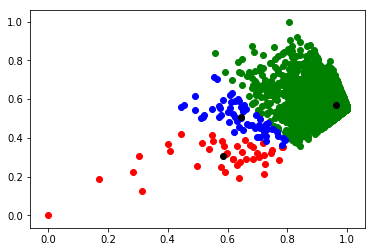

In [134]:
fig, ax = plt.subplots()

for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], c=color[i])
ax.scatter(C[:, 0], C[:, 1], marker='o', c='black')

In [135]:
 from sklearn.cluster import KMeans
SKX = data

# Initializing KMeans
kmeans = KMeans(n_clusters=20)

# Fitting with inputs
kmeans = kmeans.fit(SKX)
# Predicting the clusters
labels = kmeans.predict(SKX)
# Getting the cluster centers
C = kmeans.cluster_centers_
print(labels)

[17  9  2 ...  0  0  0]


In [136]:
import re
name_m = list(movies_names)
new = []
#print(name_m)
for i in name_m:
    try:
        dec = i.encode('utf-8').strip()
        new.append(dec)
    except:
        dec = re.sub(r'\W+', ' ', i)
        new.append(dec)
        print("old string",i)
        print(dec)
#print(len(new))

('old string', '\xa1Three Amigos!')
 Three Amigos 
('old string', 'M\xe9nage')
M nage
('old string', 'T\xfanel al infierno')
T nel al infierno
('old string', 'El pr\xedncipe Cascanueces')
El pr ncipe Cascanueces
('old string', '\xa1Ay, Carmela!')
 Ay Carmela 
('old string', 'The Naked Gun 2\xbd: The Smell of Fear')
The Naked Gun 2 The Smell of Fear
('old string', 'S\xf3lo con tu pareja')
S lo con tu pareja
('old string', 'Jam\xf3n, Jam\xf3n')
Jam n Jam n
('old string', '1492: Conquista del Para\xedso')
1492 Conquista del Para so
('old string', "B\xe9b\xe9's Kids")
B b s Kids
('old string', 'L\xe9olo')
L olo
('old string', 'Un d\xeda de furia')
Un d a de furia
('old string', 'La casa de los esp\xedritus')
La casa de los esp ritus
('old string', 'Cop & \xbd')
Cop 
('old string', 'L\xe9on: The Professional')
L on The Professional
('old string', 'Ri\xa2hie Ri\xa2h')
Ri hie Ri h
('old string', 'Timecop: Polic\xeda del futuro')
Timecop Polic a del futuro
('old string', 'Ex\xf3tica')
Ex tica


In [137]:
# Create a trace
import plotly
init_notebook_mode(connected=True)

#py.tools.set_credentials_file(username='manviagarwal', api_key='Pesu@123')

trace = go.Scatter(
    x=SKX[:,0], 
    y=SKX[:,1],
    mode='markers',
    name='Lines, Markers and Text',
    text = new,
    textposition='top',
    marker=dict(
        color = labels,
        colorscale='Portland',
        showscale=True
    )
)

dataL = [trace]
# layout = go.Layout(
    
# )
layout = go.Layout(
    autosize=True,
    showlegend=False
)

fig = go.Figure(data=dataL, layout=layout)

plotly.offline.plot(dataL,filename='Final cluster plot',auto_open=True)




'file://C:\\Users\\maanv\\OneDrive\\Desktop\\Fall 2018\\ML\\Datasets\\Final cluster plot.html'